In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries

In [2]:
df = pd.read_csv("../data/AirPassengers.csv")
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
series = TimeSeries.from_dataframe(df, time_col="Month", value_cols="#Passengers")
#train, val = series[:-36], series[-36:]
train, val = series.split_after(0.8)
len(series)

144

(True, np.int64(12))

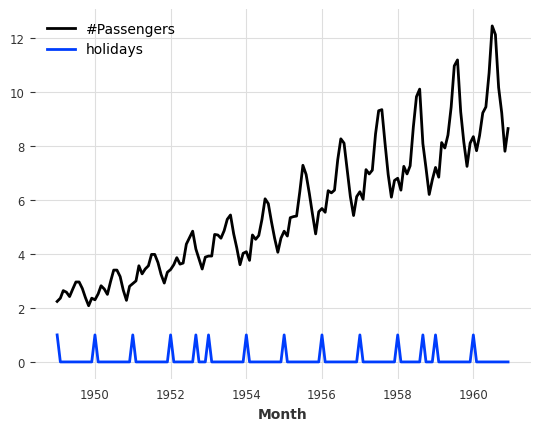

In [4]:
from darts.utils.statistics import check_seasonality
(series/50).add_holidays("US").plot()
check_seasonality(series)

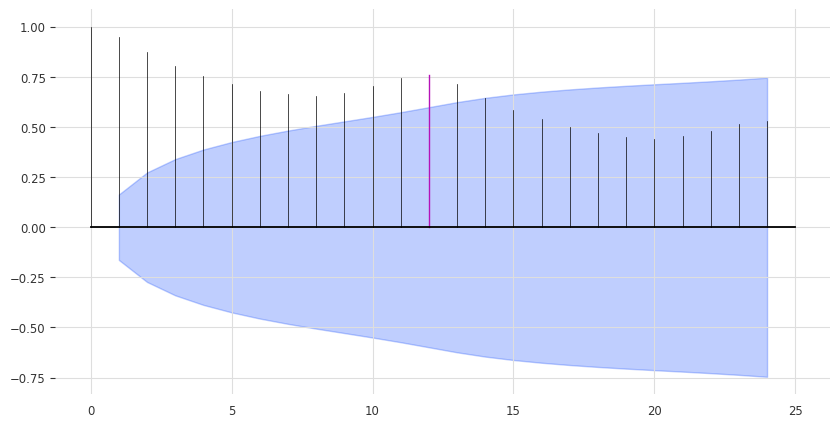

In [5]:
from darts.utils.statistics import plot_acf

plot_acf(series, m=12, alpha=0.05, max_lag=24)

In [24]:
from darts.metrics import mape

def fit_and_show_forecast(model, probabilistic=True):
    model.fit(train)
    if probabilistic:
        pred = model.predict(len(val), num_samples=500)
    else:
        pred = model.predict(len(val))

    print(f"Mean Absolute Percentage Error: {mape(series, pred):.2f}%.")
    
    series.plot(label="True")
    pred.plot(label="Predicted")
    return pred

Mean Absolute Percentage Error: 14.04%.


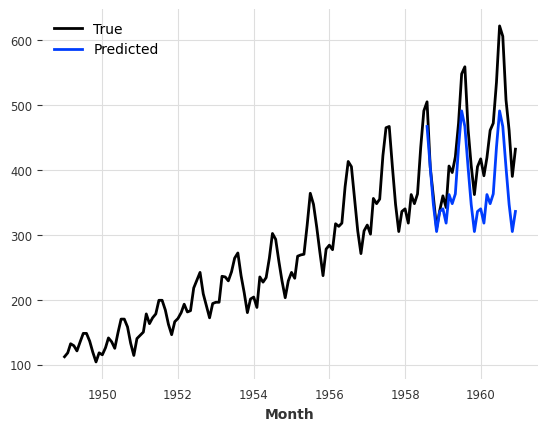

In [15]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=12)
pred_naive_seasonal = fit_and_show_forecast(naive_model, probabilistic=False)

Mean Absolute Percentage Error: 27.63%.


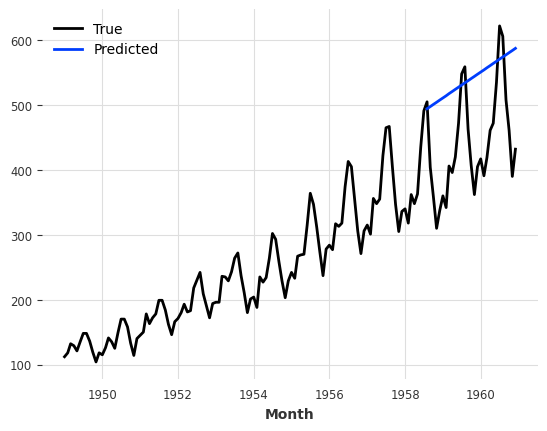

In [16]:
from darts.models import NaiveDrift

naive_model = NaiveDrift()
pred_drift = fit_and_show_forecast(naive_model, probabilistic=False)

Mean Absolute Percentage Error: 4.29%.


<Axes: xlabel='Month'>

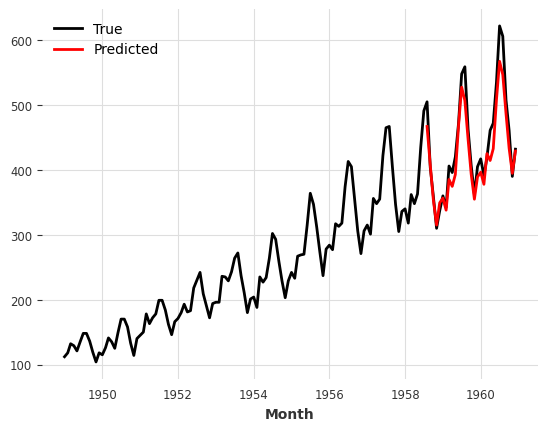

In [17]:
pred_combined = pred_naive_seasonal + (pred_drift-pred_drift[0])
print(f"Mean Absolute Percentage Error: {mape(series, pred_combined):.2f}%.")
series.plot(label="True")
pred_combined.plot(label="Predicted", color="red")


Mean Absolute Percentage Error: 9.31%.


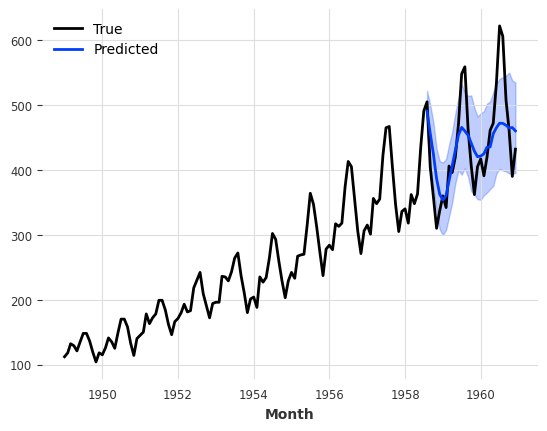

In [25]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
pred_aarima = fit_and_show_forecast(model_aarima)

Mean Absolute Percentage Error: 6.69%.


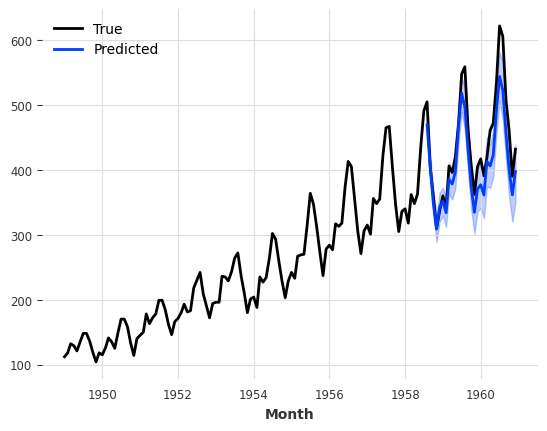

In [26]:
from darts.models import ExponentialSmoothing

model_ES = ExponentialSmoothing()
pred_ES = fit_and_show_forecast(model_ES)